In [614]:
#imports
import pandas as pd
import numpy as np
import math as math
#import scipy
#from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

set_option('display.width', 100)
set_option('precision', 2)

In [615]:
dataFrame = pd.read_csv('datos.csv', header =1)
dataFrame.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [616]:
del dataFrame['ID']
# Renombrando las columnas

dataFrame.rename(columns={'LIMIT_BAL':'CREDITO','SEX':'GENERO','EDUCATION':'EDUCACION',
                       'MARRIAGE':'ESTADO_CIVIL', 'AGE': 'EDAD', 'PAY_0': 'PAGO1',
                       'PAY_2': 'PAGO2','PAY_3': 'PAGO3','PAY_4': 'PAGO4',
                      'PAY_5': 'PAGO5','PAY_6': 'PAGO6', 'BILL_AMT1': 'SALDO1', 'BILL_AMT2': 'SALDO2',
                       'BILL_AMT3': 'SALDO3', 'BILL_AMT4': 'SALDO4', 'BILL_AMT5': 'SALDO5', 'BILL_AMT6': 'SALDO6',
                       'PAY_AMT1': 'PAGADO1','PAY_AMT2': 'PAGADO2', 'PAY_AMT3': 'PAGADO3','PAY_AMT4': 'PAGADO4',
                      'PAY_AMT5': 'PAGADO5','PAY_AMT6': 'PAGADO6', 'default payment next month': 'COMPORTAMIENTO'}, inplace=True)
originalDF = dataFrame.copy()

In [617]:
# Mostrando tipos de datos del frame de datos
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
CREDITO           30000 non-null int64
GENERO            30000 non-null int64
EDUCACION         30000 non-null int64
ESTADO_CIVIL      30000 non-null int64
EDAD              30000 non-null int64
PAGO1             30000 non-null int64
PAGO2             30000 non-null int64
PAGO3             30000 non-null int64
PAGO4             30000 non-null int64
PAGO5             30000 non-null int64
PAGO6             30000 non-null int64
SALDO1            30000 non-null int64
SALDO2            30000 non-null int64
SALDO3            30000 non-null int64
SALDO4            30000 non-null int64
SALDO5            30000 non-null int64
SALDO6            30000 non-null int64
PAGADO1           30000 non-null int64
PAGADO2           30000 non-null int64
PAGADO3           30000 non-null int64
PAGADO4           30000 non-null int64
PAGADO5           30000 non-null int64
PAGADO6           30000 non-null 

# EDA Analisis

In [618]:
EDAFRAME =  originalDF.copy()

In [619]:
dataFrame.columns

Index(['CREDITO', 'GENERO', 'EDUCACION', 'ESTADO_CIVIL', 'EDAD', 'PAGO1', 'PAGO2', 'PAGO3',
       'PAGO4', 'PAGO5', 'PAGO6', 'SALDO1', 'SALDO2', 'SALDO3', 'SALDO4', 'SALDO5', 'SALDO6',
       'PAGADO1', 'PAGADO2', 'PAGADO3', 'PAGADO4', 'PAGADO5', 'PAGADO6', 'COMPORTAMIENTO'],
      dtype='object')

In [620]:
EDAFRAME['GENERO'] = EDAFRAME['GENERO'].map({1:'HOMBRE', 2:'MUJER'})
EDAFRAME['GENERO'] = EDAFRAME['GENERO'].astype('category')
# Convertimos educacion a categoria
EDAFRAME['EDUCACION'] = EDAFRAME['EDUCACION'].map({1:'PROFECIONAL', 2:'UNIVERSITARIO', 3:'SECUNDARIO', 0:'OTRAEDUCACION', 4:'OTRAEDUCACION', 5:'OTRAEDUCACION', 6:'OTRAEDUCACION'})
EDAFRAME['EDUCACION'] = EDAFRAME['EDUCACION'].astype('category')
# Convertimos estadocivil a categoria
EDAFRAME['ESTADO_CIVIL'] = EDAFRAME['ESTADO_CIVIL'].map({1:'CASADO', 2:'SOLTERO', 3:'DIVORCIADO', 2:'OTROESTADO'})
EDAFRAME['ESTADO_CIVIL'] = EDAFRAME['ESTADO_CIVIL'].astype('category')
# Convertimos comportamiento a categoria
EDAFRAME['COMPORTAMIENTO'] = EDAFRAME['COMPORTAMIENTO'].map({1:'Moroso', 0:'Normal'})

In [621]:
age_discrete = pd.cut(EDAFRAME['EDAD'], 3 , right=True, precision=0)
EDAFRAME['GRUPO EDAD'] = age_discrete

credit_discrete = pd.cut(EDAFRAME['CREDITO'], 3 , right=True, precision=0)
EDAFRAME['GRUPO CREDITO'] = credit_discrete

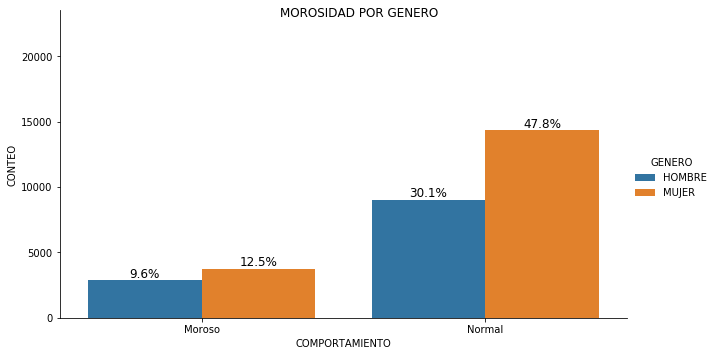

In [622]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('COMPORTAMIENTO', data=EDAFRAME, hue='GENERO', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD POR GENERO')
ax = plt.gca()
y_max = EDAFRAME['COMPORTAMIENTO'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

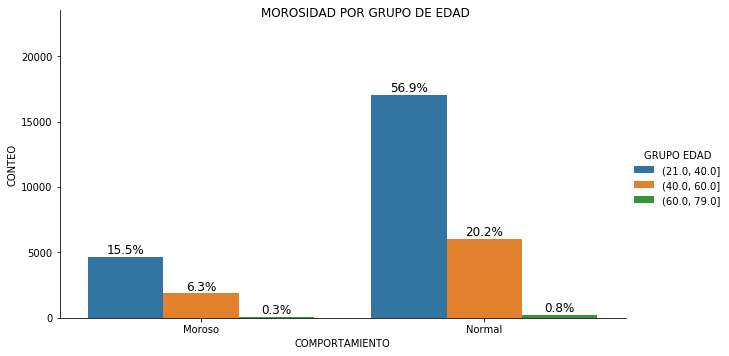

In [623]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('COMPORTAMIENTO', data=EDAFRAME, hue='GRUPO EDAD', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD POR GRUPO DE EDAD')

ax = plt.gca()
total = EDAFRAME['COMPORTAMIENTO'].count()
y_max = EDAFRAME['COMPORTAMIENTO'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

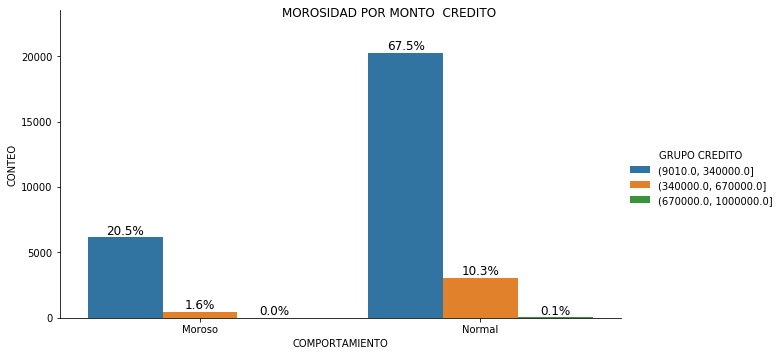

In [624]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('COMPORTAMIENTO', data=EDAFRAME, hue='GRUPO CREDITO', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD POR MONTO  CREDITO')

ax = plt.gca()
total = EDAFRAME['COMPORTAMIENTO'].count()
y_max = EDAFRAME['COMPORTAMIENTO'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

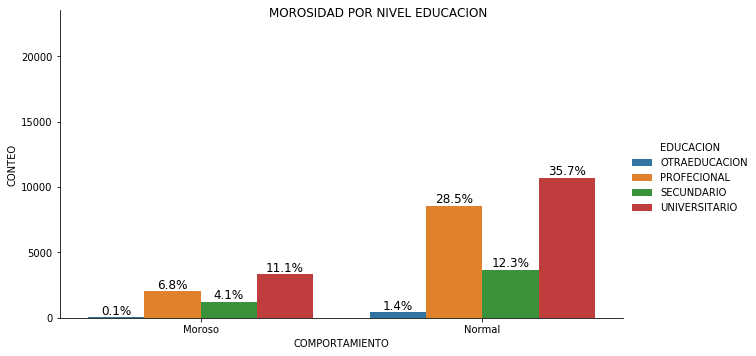

In [625]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('COMPORTAMIENTO', data=EDAFRAME, hue='EDUCACION', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD POR NIVEL EDUCACION')

ax = plt.gca()
total = EDAFRAME['COMPORTAMIENTO'].count()
y_max = EDAFRAME['COMPORTAMIENTO'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

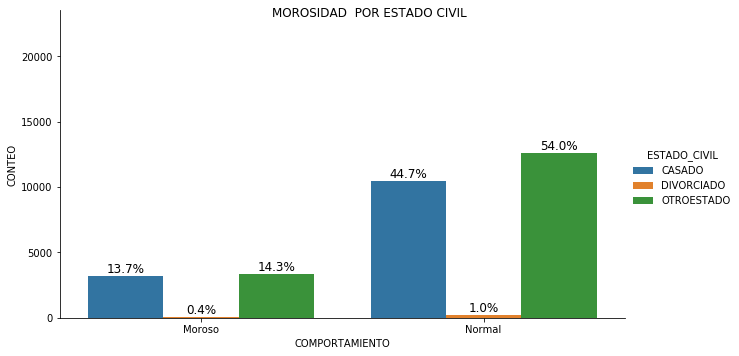

In [626]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('COMPORTAMIENTO', data=EDAFRAME, hue='ESTADO_CIVIL', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD  POR ESTADO CIVIL')

ax = plt.gca()
y_max = EDAFRAME['COMPORTAMIENTO'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

# Limpiando y procesando datos

In [627]:
print('-------------------------NORMALIZANDO DATOS-------------------------------')

CREDI_OrdinalEncoder = OrdinalEncoder()

dataFrame['CREDITO']= CREDI_OrdinalEncoder.fit_transform(dataFrame['CREDITO'].values.reshape(-1, 1))

EDAD_OrdinalEncoder = OrdinalEncoder()

dataFrame['EDAD']= EDAD_OrdinalEncoder.fit_transform(dataFrame['EDAD'].values.reshape(-1, 1))

#print('-------------------------NORMALIZANDO SALDOS-------------------------------')

EDU_OrdinalEncoder = OrdinalEncoder()

for saldo in (dataFrame.filter(regex='^SALDO\d+')) :
    #print ('Normalizando:', saldo)
    dataFrame[saldo]= EDU_OrdinalEncoder.fit_transform(dataFrame[saldo].values.reshape(-1, 1))
    
#print('-------------------------NORMALIZANDO PAGADO-------------------------------')

PAGO_OrdinalEncoder = OrdinalEncoder()

for pagado in (dataFrame.filter(regex='^PAGADO\d+')) :
    #print ('Normalizando:', pagado)
    dataFrame[pagado]= PAGO_OrdinalEncoder.fit_transform(dataFrame[pagado].values.reshape(-1, 1))

print(dataFrame.info())

-------------------------NORMALIZANDO DATOS-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
CREDITO           30000 non-null float64
GENERO            30000 non-null int64
EDUCACION         30000 non-null int64
ESTADO_CIVIL      30000 non-null int64
EDAD              30000 non-null float64
PAGO1             30000 non-null int64
PAGO2             30000 non-null int64
PAGO3             30000 non-null int64
PAGO4             30000 non-null int64
PAGO5             30000 non-null int64
PAGO6             30000 non-null int64
SALDO1            30000 non-null float64
SALDO2            30000 non-null float64
SALDO3            30000 non-null float64
SALDO4            30000 non-null float64
SALDO5            30000 non-null float64
SALDO6            30000 non-null float64
PAGADO1           30000 non-null float64
PAGADO2           30000 non-null float64
PAGADO3           30000 non-null float64
PAGADO4       

# Selección de caracteristicas mas importantes

###  [ RFE ]  - SIN DUMMIES VARIABLES

In [628]:
X = dataFrame.iloc[:, 0:23]
y = dataFrame.iloc[:, -1]

In [629]:
model = LinearRegression()
#Initializing RFE model
rfe_SD = RFE(model, 23)
#Transforming data using RFE
X_rfe_SD = rfe_SD.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe_SD,y)
print(rfe_SD.support_)
print(rfe_SD.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [630]:
#no of features
nof_list=np.arange(1, 23)            
high_score_SD=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe_SD = RFE(model, nof_list[n])
    X_train_rfe_SD = rfe_SD.fit_transform(X_train, y_train)
    X_test_rfe_SD = rfe_SD.transform(X_test)
    model.fit(X_train_rfe_SD, y_train)
    score = model.score(X_test_rfe_SD, y_test)
    score_list.append(score)
    if(score > high_score_SD):
        high_score_SD = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score_SD))

Optimum number of features: 14
Score with 14 features: 0.143029


In [631]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe_SD = RFE(model, 14)             
#Transforming data using RFE
X_rfe_SD = rfe_SD.fit_transform(X, y)  
#Fitting the data to model
model.fit(X_rfe_SD, y)              
temp = pd.Series(rfe_SD.support_, index = cols)
selected_features_rfe_SD = temp[temp==True].index
print(selected_features_rfe_SD)

Index(['CREDITO', 'GENERO', 'EDUCACION', 'ESTADO_CIVIL', 'EDAD', 'PAGO1', 'PAGO2', 'PAGO3',
       'PAGO4', 'PAGO5', 'PAGO6', 'SALDO1', 'PAGADO1', 'PAGADO2'],
      dtype='object')


###  [ RFE ]  - CON DUMMIES VARIABLES

In [632]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
CREDITO           30000 non-null float64
GENERO            30000 non-null int64
EDUCACION         30000 non-null int64
ESTADO_CIVIL      30000 non-null int64
EDAD              30000 non-null float64
PAGO1             30000 non-null int64
PAGO2             30000 non-null int64
PAGO3             30000 non-null int64
PAGO4             30000 non-null int64
PAGO5             30000 non-null int64
PAGO6             30000 non-null int64
SALDO1            30000 non-null float64
SALDO2            30000 non-null float64
SALDO3            30000 non-null float64
SALDO4            30000 non-null float64
SALDO5            30000 non-null float64
SALDO6            30000 non-null float64
PAGADO1           30000 non-null float64
PAGADO2           30000 non-null float64
PAGADO3           30000 non-null float64
PAGADO4           30000 non-null float64
PAGADO5           30000 non-null float64
PAGADO6

In [633]:
dataFrame.head()

,CREDITO,GENERO,EDUCACION,ESTADO_CIVIL,EDAD,PAGO1,PAGO2,PAGO3,PAGO4,PAGO5,...,SALDO4,SALDO5,SALDO6,PAGADO1,PAGADO2,PAGADO3,PAGADO4,PAGADO5,PAGADO6,COMPORTAMIENTO
0,2.0,2,2,1,3.0,2,2,-1,-1,-2,...,377.0,384.0,414.0,0.0,494.0,0.0,0.0,0.0,0.0,1
1,12.0,2,2,2,5.0,-1,2,0,0,0,...,2344.0,2452.0,2402.0,0.0,699.0,885.0,946.0,0.0,1797.0,1
2,9.0,2,2,2,13.0,0,0,0,0,0,...,6135.0,6365.0,6480.0,1211.0,1185.0,885.0,946.0,949.0,3576.0,0
3,5.0,2,2,1,16.0,0,0,0,0,0,...,10118.0,10391.0,10482.0,1674.0,1674.0,1079.0,1043.0,1018.0,928.0,0
4,5.0,1,2,1,36.0,-1,0,-1,0,0,...,8476.0,7794.0,7708.0,1674.0,7301.0,5346.0,4841.0,647.0,630.0,0


In [634]:
dataFrame['GENERO'] = dataFrame['GENERO'].map({1:'HOMBRE', 2:'MUJER'})
dataFrame['GENERO'] = dataFrame['GENERO'].astype('category')
# Convertimos educacion a categoria
dataFrame['EDUCACION'] = dataFrame['EDUCACION'].map({1:'PROFECIONAL', 2:'UNIVERSITARIO', 3:'SECUNDARIO', 0:'OTRAEDUCACION', 4:'OTRAEDUCACION', 5:'OTRAEDUCACION', 6:'OTRAEDUCACION'})
dataFrame['EDUCACION'] = dataFrame['EDUCACION'].astype('category')
# Convertimos estadocivil a categoria
dataFrame['ESTADO_CIVIL'] = dataFrame['ESTADO_CIVIL'].map({1:'CASADO', 2:'SOLTERO', 3:'DIVORCIADO', 2:'OTROESTADO'})
dataFrame['ESTADO_CIVIL'] = dataFrame['ESTADO_CIVIL'].astype('category')


In [635]:
dataFrame.head()

,CREDITO,GENERO,EDUCACION,ESTADO_CIVIL,EDAD,PAGO1,PAGO2,PAGO3,PAGO4,PAGO5,...,SALDO4,SALDO5,SALDO6,PAGADO1,PAGADO2,PAGADO3,PAGADO4,PAGADO5,PAGADO6,COMPORTAMIENTO
0,2.0,MUJER,UNIVERSITARIO,CASADO,3.0,2,2,-1,-1,-2,...,377.0,384.0,414.0,0.0,494.0,0.0,0.0,0.0,0.0,1
1,12.0,MUJER,UNIVERSITARIO,OTROESTADO,5.0,-1,2,0,0,0,...,2344.0,2452.0,2402.0,0.0,699.0,885.0,946.0,0.0,1797.0,1
2,9.0,MUJER,UNIVERSITARIO,OTROESTADO,13.0,0,0,0,0,0,...,6135.0,6365.0,6480.0,1211.0,1185.0,885.0,946.0,949.0,3576.0,0
3,5.0,MUJER,UNIVERSITARIO,CASADO,16.0,0,0,0,0,0,...,10118.0,10391.0,10482.0,1674.0,1674.0,1079.0,1043.0,1018.0,928.0,0
4,5.0,HOMBRE,UNIVERSITARIO,CASADO,36.0,-1,0,-1,0,0,...,8476.0,7794.0,7708.0,1674.0,7301.0,5346.0,4841.0,647.0,630.0,0


In [636]:
print(dataFrame.EDUCACION.value_counts())
ED_dummies = pd.get_dummies(dataFrame.EDUCACION)
ED_dummies.info()
dataFrame =  pd.concat([dataFrame, ED_dummies], axis=1)

UNIVERSITARIO    14030
PROFECIONAL      10585
SECUNDARIO        4917
OTRAEDUCACION      468
Name: EDUCACION, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
OTRAEDUCACION    30000 non-null uint8
PROFECIONAL      30000 non-null uint8
SECUNDARIO       30000 non-null uint8
UNIVERSITARIO    30000 non-null uint8
dtypes: uint8(4)
memory usage: 117.3 KB


In [637]:
print(dataFrame.GENERO.value_counts())
GN_dummies = pd.get_dummies(dataFrame.GENERO)
dataFrame =  pd.concat([dataFrame, GN_dummies], axis=1)

MUJER     18112
HOMBRE    11888
Name: GENERO, dtype: int64


In [638]:
print(dataFrame.ESTADO_CIVIL.value_counts())
EC_dummies = pd.get_dummies(dataFrame.ESTADO_CIVIL)
dataFrame =  pd.concat([dataFrame, EC_dummies], axis=1)

OTROESTADO    15964
CASADO        13659
DIVORCIADO      323
Name: ESTADO_CIVIL, dtype: int64


In [639]:

cols_at_end = ['COMPORTAMIENTO']
dataFrame = dataFrame[[c for c in dataFrame if c not in cols_at_end] 
        + [c for c in cols_at_end if c in dataFrame]]

ORIGEN_DUMMIES = dataFrame.filter( ['GENERO', 'EDUCACION', 'ESTADO_CIVIL'], axis=1)


del dataFrame['GENERO']
del dataFrame['EDUCACION']
del dataFrame['ESTADO_CIVIL']
#print(dataFrame.info())

In [640]:
X = dataFrame.iloc[:, 0:29]
y = dataFrame.iloc[:, -1]

In [641]:
model = LinearRegression()
#Initializing RFE model
rfe_CD = RFE(model, 29)
#Transforming data using RFE
X_rfe_CD = rfe_CD.fit_transform(X, y)  
#Fitting the data to model
model.fit(X_rfe_CD, y)
print(rfe_CD.support_)
print(rfe_CD.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [642]:
#no of features
nof_list=np.arange(1,30)            
high_score_CD=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe_CD = RFE(model, nof_list[n])
    X_train_rfe_CD = rfe_CD.fit_transform(X_train, y_train)
    X_test_rfe_CD = rfe_CD.transform(X_test)
    model.fit(X_train_rfe_CD, y_train)
    score = model.score(X_test_rfe_CD, y_test)
    score_list.append(score)
    if(score > high_score_CD):
        high_score_CD = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score_CD))

Optimum number of features: 20
Score with 20 features: 0.143595


In [643]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe_CD = RFE(model, 20)             
#Transforming data using RFE
X_rfe_CD = rfe_CD.fit_transform(X, y)  
#Fitting the data to model
model.fit(X_rfe_CD, y)              
temp = pd.Series(rfe_CD.support_,index = cols)
selected_features_rfe_CD = temp[temp==True].index
print(selected_features_rfe_CD)


Index(['CREDITO', 'EDAD', 'PAGO1', 'PAGO2', 'PAGO3', 'PAGO4', 'PAGO5', 'PAGO6', 'SALDO1',
       'PAGADO1', 'PAGADO2', 'OTRAEDUCACION', 'PROFECIONAL', 'SECUNDARIO', 'UNIVERSITARIO',
       'HOMBRE', 'MUJER', 'CASADO', 'DIVORCIADO', 'OTROESTADO'],
      dtype='object')


# Seleccion de caracteristicas y correlacion

In [644]:
df = dataFrame.filter(selected_features_rfe_CD, axis=1)
df = pd.concat([df, y], axis=1)


In [645]:
#Generamos una matriz de correlacion con mapa de calor
correlacion = df.corr()
correlacion.style.background_gradient(cmap='coolwarm').set_precision(2)

,CREDITO,EDAD,PAGO1,PAGO2,PAGO3,PAGO4,PAGO5,PAGO6,SALDO1,PAGADO1,PAGADO2,OTRAEDUCACION,PROFECIONAL,SECUNDARIO,UNIVERSITARIO,HOMBRE,MUJER,CASADO,DIVORCIADO,OTROESTADO,COMPORTAMIENTO
CREDITO,1,0.14,-0.27,-0.3,-0.28,-0.27,-0.25,-0.23,0.073,0.32,0.33,0.013,0.26,-0.14,-0.15,-0.024,0.024,0.1,-0.055,-0.091,-0.15
EDAD,0.14,1,-0.039,-0.05,-0.053,-0.05,-0.054,-0.049,0.0098,0.032,0.042,0.009,-0.1,0.23,-0.078,0.091,-0.091,0.45,0.083,-0.47,0.014
PAGO1,-0.27,-0.039,1,0.67,0.57,0.54,0.51,0.47,0.29,-0.11,-0.1,-0.025,-0.14,0.059,0.099,0.058,-0.058,-0.016,0.017,0.013,0.32
PAGO2,-0.3,-0.05,0.67,1,0.77,0.66,0.62,0.58,0.41,-0.083,-0.029,-0.033,-0.17,0.065,0.12,0.071,-0.071,-0.023,0.012,0.02,0.26
PAGO3,-0.28,-0.053,0.57,0.77,1,0.78,0.69,0.63,0.37,0.1,-0.074,-0.034,-0.16,0.062,0.12,0.066,-0.066,-0.031,0.017,0.027,0.24
PAGO4,-0.27,-0.05,0.54,0.66,0.78,1,0.82,0.72,0.36,0.069,0.11,-0.031,-0.15,0.058,0.11,0.06,-0.06,-0.03,0.017,0.027,0.22
PAGO5,-0.25,-0.054,0.51,0.62,0.69,0.82,1,0.82,0.35,0.065,0.093,-0.029,-0.14,0.05,0.1,0.055,-0.055,-0.034,0.011,0.032,0.2
PAGO6,-0.23,-0.049,0.47,0.58,0.63,0.72,0.82,1,0.35,0.073,0.078,-0.036,-0.13,0.041,0.098,0.044,-0.044,-0.032,0.016,0.029,0.19
SALDO1,0.073,0.0098,0.29,0.41,0.37,0.36,0.35,0.35,1,0.45,0.41,0.029,-0.1,0.0084,0.084,0.038,-0.038,0.0037,-0.0015,-0.0018,-0.026
PAGADO1,0.32,0.032,-0.11,-0.083,0.1,0.069,0.065,0.073,0.45,1,0.52,0.023,0.068,-0.044,-0.039,0.0029,-0.0029,0.009,-0.017,-0.0049,-0.15


In [646]:
#Sacamos la variable objetivo o dependiente
target = df.iloc[:, -1]

In [647]:
#Sacamos los valores de las propiedades
propiedades = df.iloc[: ,0:20]

# Entrenamiento y calibracion de modelos

In [648]:
print('----------------------------------------------------------------------------------------------------')
#De las propiedades totales sacamos el 75% (22500) para entrenamiento
X_train = (propiedades[: 22500])
print('Número de observaciones en nuestro frame de propiedades de  entrenamiento (x):', len(X_train.index))
print('----------------------------------------------------------------------------------------------------')
print(X_train.head())
print('----------------------------------------------------------------------------------------------------')
#Sacamos el 75% (22500) De los los datos totales de nuestro target o variable dependiente para entrenamiento
y_train = target[: 22500]
print('Número de observaciones en nuestro frame objetivo (y): ', len(X_train.index))
print('----------------------------------------------------------------------------------------------------')
print(y_train.head())
print('----------------------------------------------------------------------------------------------------')

----------------------------------------------------------------------------------------------------
Número de observaciones en nuestro frame de propiedades de  entrenamiento (x): 22500
----------------------------------------------------------------------------------------------------
   CREDITO  EDAD  PAGO1  PAGO2  PAGO3  PAGO4  PAGO5  PAGO6   SALDO1  PAGADO1  PAGADO2  \
0      2.0   3.0      2      2     -1     -1     -2     -2   2710.0      0.0    494.0   
1     12.0   5.0     -1      2      0      0      0      2   2064.0      0.0    699.0   
2      9.0  13.0      0      0      0      0      0      0  10068.0   1211.0   1185.0   
3      5.0  16.0      0      0      0      0      0      0  12731.0   1674.0   1674.0   
4      5.0  36.0     -1      0     -1      0      0      0   4628.0   1674.0   7301.0   

   OTRAEDUCACION  PROFECIONAL  SECUNDARIO  UNIVERSITARIO  HOMBRE  MUJER  CASADO  DIVORCIADO  \
0              0            0           0              1       0      1       1    

In [649]:
print('----------------------------------------------------------------------------------------------------')
#De las propiedades totales sacamos el 25% (7500) para testeo
X_test = (propiedades[-7500:])
print('Número de observaciones en nuestro frame de propiedades de  entrenamiento (x):', len(X_test.index))
print('----------------------------------------------------------------------------------------------------')
print(X_test.head())
print('----------------------------------------------------------------------------------------------------')
#Sacamos el 25% (7500) De los los datos totales de nuestro target o variable dependiente para testeo
y_test = target[-7500:]
print('Número de observaciones en nuestro frame objetivo (y): ', len(y_test.index))
print('----------------------------------------------------------------------------------------------------')
print(y_test.head())
print('----------------------------------------------------------------------------------------------------')

----------------------------------------------------------------------------------------------------
Número de observaciones en nuestro frame de propiedades de  entrenamiento (x): 7500
----------------------------------------------------------------------------------------------------
       CREDITO  EDAD  PAGO1  PAGO2  PAGO3  PAGO4  PAGO5  PAGO6   SALDO1  PAGADO1  PAGADO2  \
22500     18.0  12.0     -1     -1     -1     -1     -1     -1   2500.0      0.0    807.0   
22501     23.0  12.0      0      0      0      0      0      0  11486.0   1674.0   1655.0   
22502      5.0  23.0      0      0      2      3      2      0   6825.0   2616.0   2098.0   
22503     26.0  11.0      0      0      0      0      0      0  21872.0   5559.0   5242.0   
22504     26.0  12.0     -1     -1     -1     -1     -1      0   3264.0   6147.0   7122.0   

       OTRAEDUCACION  PROFECIONAL  SECUNDARIO  UNIVERSITARIO  HOMBRE  MUJER  CASADO  DIVORCIADO  \
22500              0            0           0           

In [650]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify = y_train)
X_train.shape, X_test.shape

((16875, 20), (5625, 20))

# Random Forest (RF)

In [651]:
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Ran = RandomForestClassifier()
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.8097777777777778


In [652]:
Ran_y_pred_prob = Ran.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, Ran_y_pred_prob)

0.7605879231701698

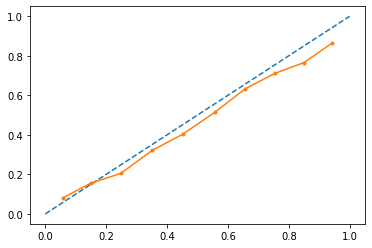

In [653]:
# Modelo sin calibrar
fop, mpv = calibration_curve(y_test, Ran_y_pred_prob, n_bins=10)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(mpv, fop, marker='.')
plt.show()

Normalized confusion matrix
[[0.94118998 0.05881002]
 [0.63993711 0.36006289]]


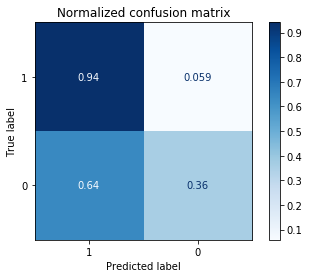

In [654]:
#confusion matrix
disp = plot_confusion_matrix(Ran, X_test, y_test, display_labels=target.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Normalized confusion matrix')
print('Normalized confusion matrix')
print(disp.confusion_matrix)
plt.show()

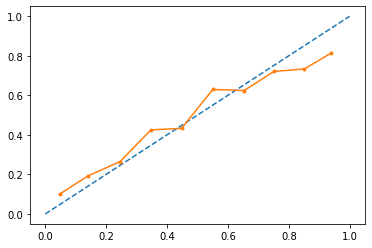

In [655]:
from sklearn.calibration import CalibratedClassifierCV
#Calibrated Random Forest
calibrated = CalibratedClassifierCV(Ran, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)

# predict probabilities
Ran_y_pred_probs_calibrated = calibrated.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, Ran_y_pred_probs_calibrated, n_bins=10, normalize=True)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
plt.plot(mpv, fop, marker='.')
plt.show()


Normalized confusion matrix
[[0.95841948 0.04158052]
 [0.67374214 0.32625786]]


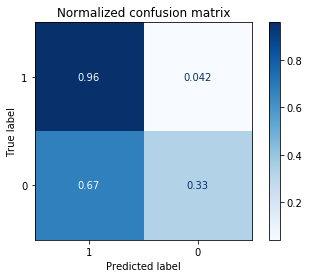

In [656]:
#confusion matrix
disp = plot_confusion_matrix(calibrated, X_test, y_test, display_labels=target.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Normalized confusion matrix')
print('Normalized confusion matrix')
print(disp.confusion_matrix)
plt.show()

# K-nearest neighbors (KNN)

In [657]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kneigh = KNeighborsClassifier(n_neighbors=50)
#Train the algorithm
kneigh.fit(X_train, y_train)
pred = kneigh.predict(X_test)

print ("KNeighbors accuracy score : ",accuracy_score(y_test, pred))

KNeighbors accuracy score :  0.7745777777777778


In [658]:
kneigh_y_pred_prob = kneigh.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, kneigh_y_pred_prob)

0.6576750003973258

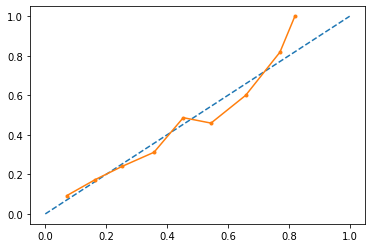

In [659]:
# Un calibrated reliability diagram for K nearest neighbors
fop, mpv = calibration_curve(y_test, kneigh_y_pred_prob, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()

Normalized confusion matrix
[[0.98345968 0.01654032]
 [0.94025157 0.05974843]]


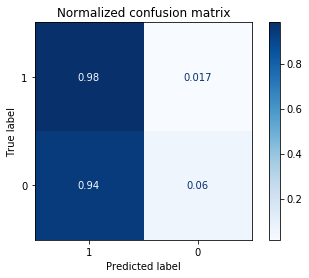

In [660]:
# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(kneigh, X_test, y_test, display_labels=target.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Normalized confusion matrix')
print('Normalized confusion matrix')
print(disp.confusion_matrix)
plt.show()

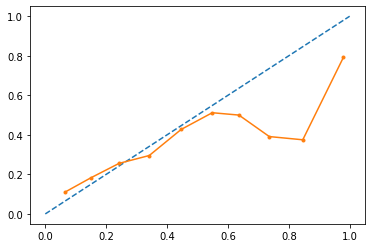

In [661]:
from sklearn.calibration import CalibratedClassifierCV
#Calibrated K-nearestneighbors
calibrated = CalibratedClassifierCV(kneigh, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)

# predict probabilities
kneigh_y_pred_probs_calibrated = calibrated.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, kneigh_y_pred_probs_calibrated, n_bins=10, normalize=True)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
plt.plot(mpv, fop, marker='.')
plt.show()

Normalized confusion matrix
[[0.98345968 0.01654032]
 [0.94025157 0.05974843]]


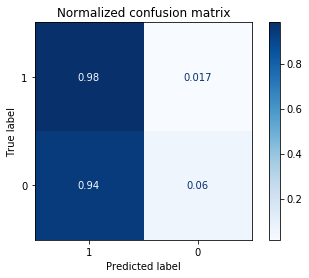

In [662]:
# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(kneigh, X_test, y_test, display_labels=target.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Normalized confusion matrix')
print('Normalized confusion matrix')
print(disp.confusion_matrix)
plt.show()

#  Decision Tree

In [663]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, max_features = 8, min_samples_leaf = 2, random_state = 0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.8195555555555556


In [664]:
Tree_y_pred_prob = Tree.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, Tree_y_pred_prob)

0.7561247791229067

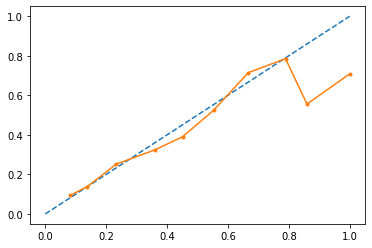

In [665]:
# Un calibrated reliability diagram for K nearest neighbors
fop, mpv = calibration_curve(y_test, Tree_y_pred_prob, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()

Normalized confusion matrix
[[0.99195957 0.00804043]
 [0.97091195 0.02908805]]


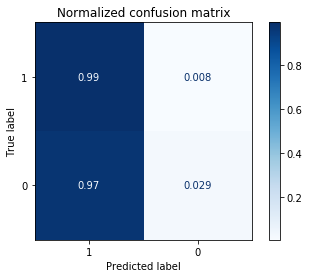

In [666]:
# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(calibrated, X_test, y_test, display_labels=target.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Normalized confusion matrix')
print('Normalized confusion matrix')
print(disp.confusion_matrix)
plt.show()

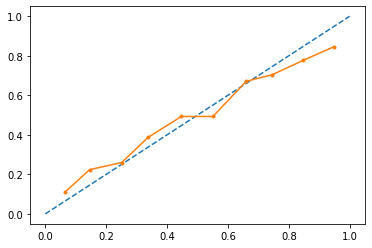

In [667]:
from sklearn.calibration import CalibratedClassifierCV
#Calibrated Decision Tree
calibrated = CalibratedClassifierCV(Tree, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)

# predict probabilities
Tree_y_pred_probs_calibrated = calibrated.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, Tree_y_pred_probs_calibrated, n_bins=10, normalize=True)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
plt.plot(mpv, fop, marker='.')
plt.show()

Normalized confusion matrix
[[0.96186538 0.03813462]
 [0.66194969 0.33805031]]


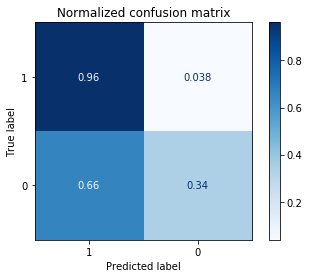

In [668]:
# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(calibrated, X_test, y_test, display_labels=target.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Normalized confusion matrix')
print('Normalized confusion matrix')
print(disp.confusion_matrix)
plt.show()

# Seleccion aplicando mejor modelo (RandomForest)

In [669]:
ALLDATA_X = dataFrame.filter(selected_features_rfe_CD, axis=1)
ALLDATA_Y = dataFrame.iloc[:, -1]

In [670]:
PREDICCION_FINAL = Ran.predict(ALLDATA_X)
print('Accuracy:', accuracy_score(PREDICCION_FINAL, ALLDATA_Y))

Accuracy: 0.9199666666666667


Normalized confusion matrix
[[0.97624551 0.02375449]
 [0.27817963 0.72182037]]


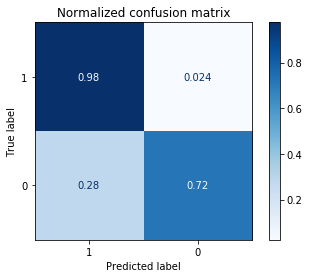

In [671]:
# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(Ran, ALLDATA_X, ALLDATA_Y, display_labels=ALLDATA_Y.unique(), cmap=plt.cm.Blues, normalize= 'true')
disp.ax_.set_title('Normalized confusion matrix')
print('Normalized confusion matrix')
print(disp.confusion_matrix)
plt.show()

In [672]:
ALLDATA_X['PREDICCION'] = PREDICCION_FINAL
ALLDATA_X['COMPORTAMIENTO'] = ALLDATA_Y
ALLDATA_X.head()

,CREDITO,EDAD,PAGO1,PAGO2,PAGO3,PAGO4,PAGO5,PAGO6,SALDO1,PAGADO1,...,PROFECIONAL,SECUNDARIO,UNIVERSITARIO,HOMBRE,MUJER,CASADO,DIVORCIADO,OTROESTADO,PREDICCION,COMPORTAMIENTO
0,2.0,3.0,2,2,-1,-1,-2,-2,2710.0,0.0,...,0,0,1,0,1,1,0,0,1,1
1,12.0,5.0,-1,2,0,0,0,2,2064.0,0.0,...,0,0,1,0,1,0,0,1,0,1
2,9.0,13.0,0,0,0,0,0,0,10068.0,1211.0,...,0,0,1,0,1,0,0,1,0,0
3,5.0,16.0,0,0,0,0,0,0,12731.0,1674.0,...,0,0,1,0,1,1,0,0,0,0
4,5.0,36.0,-1,0,-1,0,0,0,4628.0,1674.0,...,0,0,1,1,0,1,0,0,0,0


In [673]:
ALLDATA_X.CREDITO = CREDI_OrdinalEncoder.inverse_transform(ALLDATA_X.CREDITO.values.reshape(-1, 1))
ALLDATA_X.EDAD = EDAD_OrdinalEncoder.inverse_transform(ALLDATA_X.EDAD.values.reshape(-1, 1))
ALLDATA_X['COMPORTAMIENTO'] = ALLDATA_X['COMPORTAMIENTO'].map({1:'Moroso', 0:'Normal'})
ALLDATA_X['PREDICCION'] = ALLDATA_X['PREDICCION'].map({1:'Moroso', 0:'Normal'})

In [674]:
age_discrete = pd.cut(ALLDATA_X['EDAD'], 3 , right=True, precision=0)
ALLDATA_X['GRUPO EDAD'] = age_discrete

credit_discrete = pd.cut(ALLDATA_X['CREDITO'], 3 , right=True, precision=0)
ALLDATA_X['GRUPO CREDITO'] = credit_discrete
ALLDATA_X = pd.concat([ALLDATA_X, ORIGEN_DUMMIES], axis=1)



In [675]:
ALLDATA_X.head()

,CREDITO,EDAD,PAGO1,PAGO2,PAGO3,PAGO4,PAGO5,PAGO6,SALDO1,PAGADO1,...,CASADO,DIVORCIADO,OTROESTADO,PREDICCION,COMPORTAMIENTO,GRUPO EDAD,GRUPO CREDITO,GENERO,EDUCACION,ESTADO_CIVIL
0,20000,24,2,2,-1,-1,-2,-2,2710.0,0.0,...,1,0,0,Moroso,Moroso,"(21.0, 40.0]","(9010.0, 340000.0]",MUJER,UNIVERSITARIO,CASADO
1,120000,26,-1,2,0,0,0,2,2064.0,0.0,...,0,0,1,Normal,Moroso,"(21.0, 40.0]","(9010.0, 340000.0]",MUJER,UNIVERSITARIO,OTROESTADO
2,90000,34,0,0,0,0,0,0,10068.0,1211.0,...,0,0,1,Normal,Normal,"(21.0, 40.0]","(9010.0, 340000.0]",MUJER,UNIVERSITARIO,OTROESTADO
3,50000,37,0,0,0,0,0,0,12731.0,1674.0,...,1,0,0,Normal,Normal,"(21.0, 40.0]","(9010.0, 340000.0]",MUJER,UNIVERSITARIO,CASADO
4,50000,57,-1,0,-1,0,0,0,4628.0,1674.0,...,1,0,0,Normal,Normal,"(40.0, 60.0]","(9010.0, 340000.0]",HOMBRE,UNIVERSITARIO,CASADO


# Comparando resultados

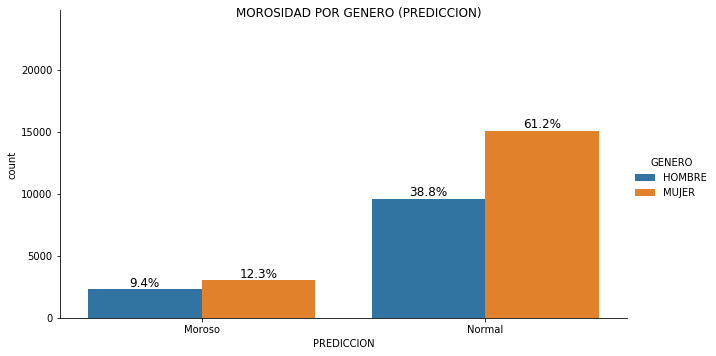

In [676]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('PREDICCION', data=ALLDATA_X, hue='GENERO', kind='count', aspect=1.75)
#fg.set_xlabels('GENERO POR CLIENTES')
fg.fig.suptitle('MOROSIDAD POR GENERO (PREDICCION)')

ax = plt.gca()
y_max = ALLDATA_X['PREDICCION'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

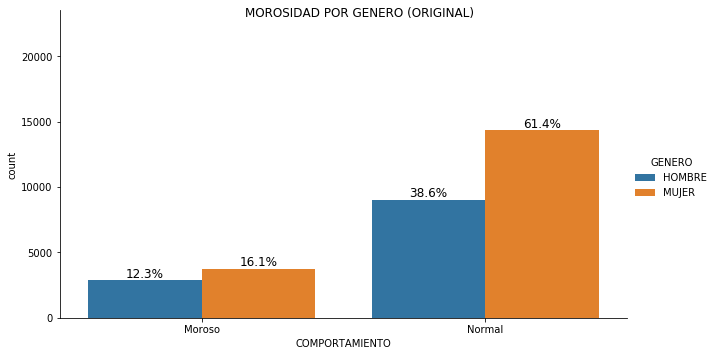

In [677]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('COMPORTAMIENTO', data=ALLDATA_X, hue='GENERO', kind='count', aspect=1.75)
#fg.set_xlabels('GENERO POR CLIENTES')
fg.fig.suptitle('MOROSIDAD POR GENERO (ORIGINAL)')

ax = plt.gca()
y_max = ALLDATA_X['COMPORTAMIENTO'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

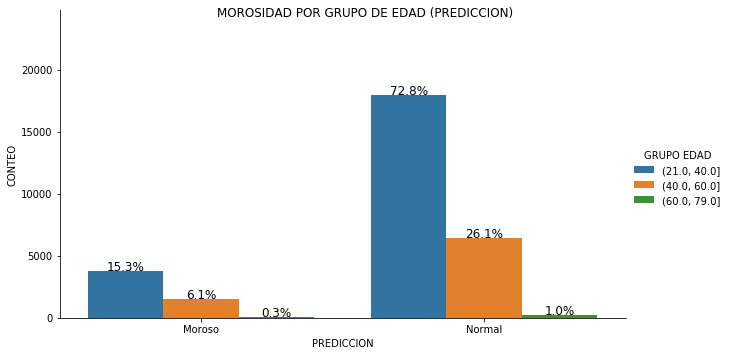

In [687]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('PREDICCION', data=ALLDATA_X, hue='GRUPO EDAD', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD POR GRUPO DE EDAD (PREDICCION)')

ax = plt.gca()
y_max = ALLDATA_X['PREDICCION'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

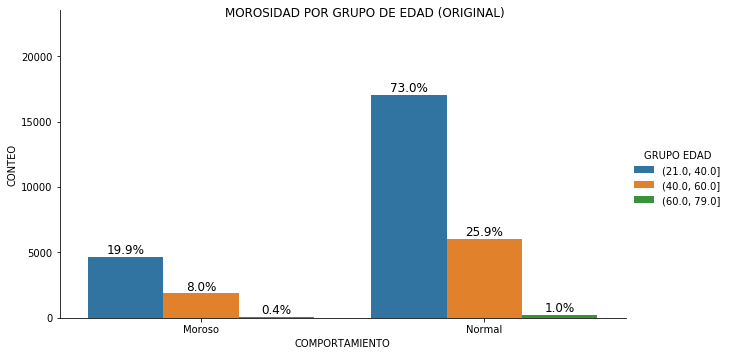

In [679]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('COMPORTAMIENTO', data=ALLDATA_X, hue='GRUPO EDAD', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD POR GRUPO DE EDAD (ORIGINAL)')

ax = plt.gca()
y_max = ALLDATA_X['COMPORTAMIENTO'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

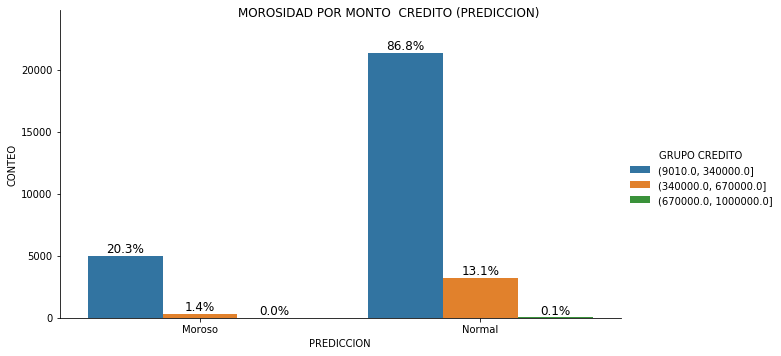

In [680]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('PREDICCION', data=ALLDATA_X, hue='GRUPO CREDITO', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD POR MONTO  CREDITO (PREDICCION)')

ax = plt.gca()
y_max = ALLDATA_X['PREDICCION'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

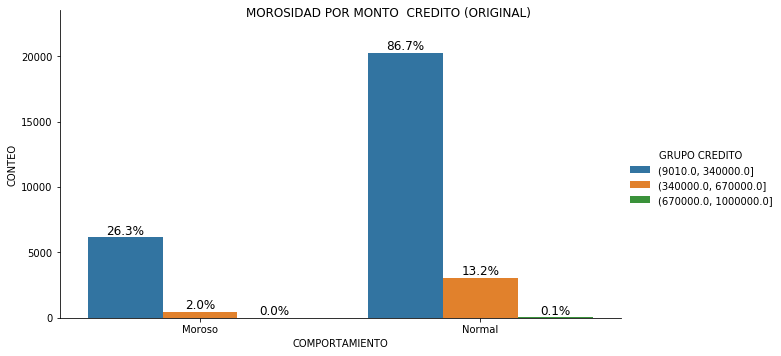

In [681]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('COMPORTAMIENTO', data=ALLDATA_X, hue='GRUPO CREDITO', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD POR MONTO  CREDITO (ORIGINAL)')

ax = plt.gca()
y_max = ALLDATA_X['COMPORTAMIENTO'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

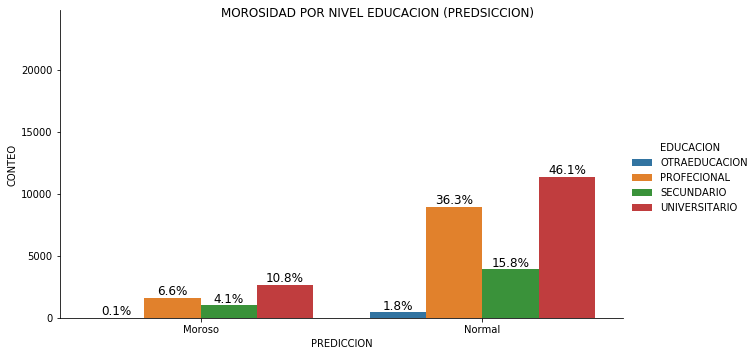

In [682]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('PREDICCION', data=ALLDATA_X, hue='EDUCACION', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD POR NIVEL EDUCACION (PREDSICCION)')

ax = plt.gca()
y_max = ALLDATA_X['PREDICCION'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

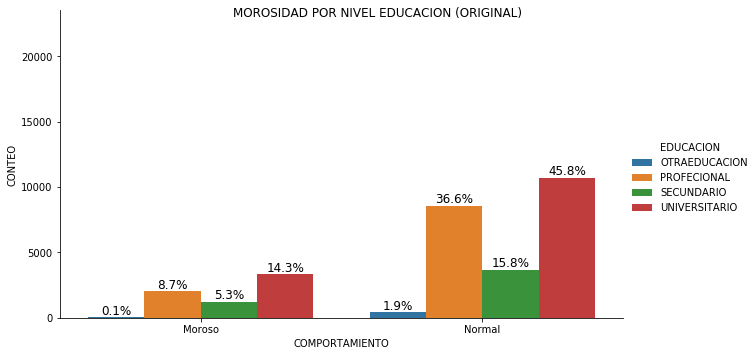

In [683]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('COMPORTAMIENTO', data=ALLDATA_X, hue='EDUCACION', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD POR NIVEL EDUCACION (ORIGINAL)')

ax = plt.gca()
y_max = ALLDATA_X['COMPORTAMIENTO'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

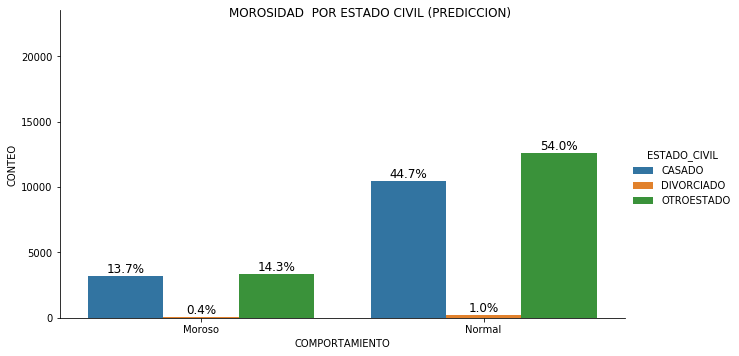

In [684]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('COMPORTAMIENTO', data=ALLDATA_X, hue='ESTADO_CIVIL', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD  POR ESTADO CIVIL (PREDICCION)')

ax = plt.gca()
y_max = ALLDATA_X['COMPORTAMIENTO'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')

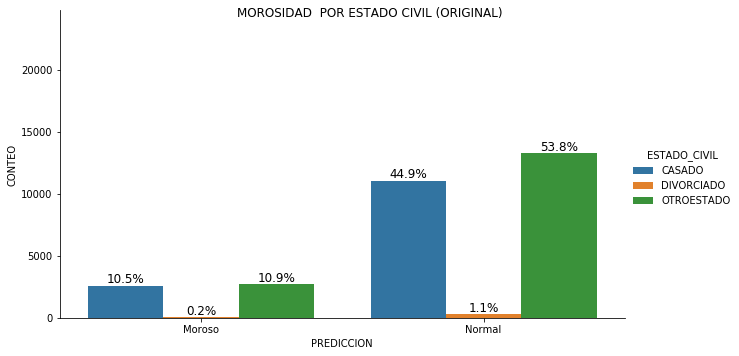

In [685]:
def roundup(x): return 100 + int(math.ceil(x / 100.0)) * 100

fg = sns.catplot('PREDICCION', data=ALLDATA_X, hue='ESTADO_CIVIL', kind='count', aspect=1.75)
fg.set_ylabels('CONTEO')
fg.fig.suptitle('MOROSIDAD  POR ESTADO CIVIL (ORIGINAL)')

ax = plt.gca()
y_max = ALLDATA_X['PREDICCION'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / y_max)
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),percentage, fontsize=12, color='black', ha='center', va='bottom')